In [60]:
import matplotlib as mpl
print(mpl.get_cachedir())
mpl.rcParams["axes.linewidth"] = 0
mpl.rcParams["xtick.major.size"] = 0
mpl.rcParams["ytick.major.size"] = 0
__gray = "#000000"
mpl.rcParams["xtick.color"] = __gray
mpl.rcParams["ytick.color"] = __gray
mpl.rcParams["axes.labelcolor"] = __gray
mpl.rcParams['font.size'] = 24
mpl.rcParams["axes.labelsize"] = 28
mpl.rcParams["xtick.labelsize"] = 20
mpl.rcParams["ytick.labelsize"] = 20
mpl.rcParams["ytick.labelsize"] = 20
mpl.rcParams['legend.fontsize'] = 24
mpl.rcParams["font.family"] = "Myriad Pro"
mpl.rcParams["legend.frameon"] = False
%pylab inline

def area_under_sorted_points(x, y):
    bin_width = diff(x)
    y_avg = (y[:-1] + y[1:])/2
    return (y_avg * bin_width).sum()

from analysis import pareto, corrected_points, folder_names, conditions
print(conditions)
conditions = ["Control", "Margin", "Gamma Slider", "Perf Slider"]
print(list(zip(conditions, folder_names)))

C:\Users\Priya Pillai\.matplotlib
Populating the interactive namespace from numpy and matplotlib
['Control', 'Margin', 'Gamma Slider', 'Performance Slider']
[('Control', './data/control/'), ('Margin', './data/margin/'), ('Gamma Slider', './data/robust_performance/'), ('Perf Slider', './data/robust_gamma/')]


C:\Users\Priya Pillai\.conda\envs\gp_ideation\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pareto', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
# figure(figsize=(12,8))
# pointids_all = {}
# for condition, folder in zip(conditions, folder_names):
#     print(folder)
#     pointids, idpoints, pointnum, skipped = corrected_points(folder)
#     pps = pareto(pointids)
#     pointids_all.update(pointids)
#     pps_all.update(pps)
#     xy = array(sorted(pps.keys()))
#     x = xy[:,0]
#     y = xy[:,1]
#     for i in range(len(x)):
#         min_idx = i
#         if x[i] > 1100:
#             break
#     for i in range(len(x)-1,-1,-1):
#         max_idx = i
#         if x[i] < 1270:
#             break
#     print(min_idx, max_idx)
#     x = x[min_idx:max_idx]
#     y = y[min_idx:max_idx]
#     area = area_under_sorted_points(x, y)
#     print(area)
#     plot(x, y, label=condition+": %i" % area)
#     legend()
#     grid(True)
    
# condition = "Overall"
# pps = pareto(pointids_all)
# xy = array(sorted(pps))
# x = xy[:,0]
# y = xy[:,1]
# for i in range(len(x)):
#     min_idx = i
#     if x[i] > 1100:
#         break
# for i in range(len(x)-1,-1,-1):
#     max_idx = i
#     if x[i] < 1270:
#         break
# print(min_idx, max_idx)
# x = x[min_idx:max_idx]
# y = y[min_idx:max_idx]
# area = area_under_sorted_points(x, y)
# print(area)
# plot(x, y, label=condition+": %i" % area)
# legend()
# grid(True)

./data/control/


NameError: name 'pps_all' is not defined

<Figure size 864x576 with 0 Axes>

In [61]:
pointids_all = {}
for condition, folder in zip(conditions, folder_names):
    pointids, idpoints, pointnum, skipped = corrected_points(folder)
    pps = pareto(pointids)
    pointids_all.update(pointids)
    
condition = "Overall"
pps_all = pareto(pointids_all)
fail_perfs = {fail: perf for perf, fail in pps_all}
for fail in range(70,-1,-1):
    if fail not in fail_perfs:
#         print "failure rate of", fail, "not achieved!"
        fail_perfs[fail] = fail_perfs[fail+1]
        
# xy = array(sorted(fail_perfs.items()))
# y = xy[:,0]
# x = xy[:,1]
# area = 0
# print area
# plot(x, y, label=condition+": %i" % area)
# legend()
# grid(True)

# figure(figsize=(12,8))
# for condition, folder in zip(conditions, folder_names):    
#     print folder
#     pointids, idpoints, pointnum, skipped = corrected_points(folder)
#     pps = pareto(pointids)
#     pointids_all.update(pointids)
#     pps_all.update(pps)
#     xy = array(sorted(pps.keys()))
#     y = xy[:,0]
#     x = xy[:,1]
#     best_y = array([fail_perfs[fail] for fail in x])
#     area = 100*(y/best_y - 1).mean()
#     print area
#     fill_between(x, best_y, y, label=condition+": %.2f" % area, alpha=0.3)
#     legend()
#     grid(True)

Control

Margin

Gamma Slider

Perf Slider



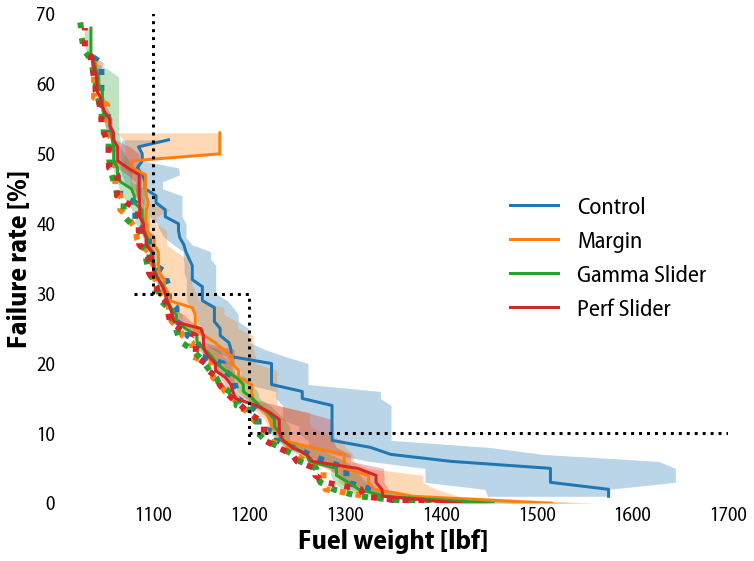

In [5]:
from collections import defaultdict
percents = defaultdict(list)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
k = 1
fig, ax = subplots(figsize=(12,9), facecolor="white")
lines = []
for k, (condition, folder) in enumerate(zip(conditions, folder_names)):
    print(condition)
    pointids, idpoints, pointnum, skipped = corrected_points(folder)
    bestsbyfail = zeros((len(idpoints), 71))
    bestsbyfail.fill(inf)
    for j, (idn, points) in enumerate(idpoints.items()):
        pps = sorted(pareto({point: idn for point in points}).keys(), reverse=True)
        for i, (perf, fail) in enumerate(pps[:-1]):
            for f in range(int(fail), int(pps[i+1][1])):
                bestsbyfail[j, f] = perf
        for f in range(int(pps[-1][1]), 71):
            bestsbyfail[j, f] = inf
    x = range(0,71)
    y = nanmedian(bestsbyfail, axis=0)
    top = nanpercentile(bestsbyfail, 75, axis=0, interpolation="linear")
    top[top == inf] = y[top == inf]
    bot = nanpercentile(bestsbyfail, 25, axis=0, interpolation="linear")
    ax.fill_betweenx(x, bot, top, lw=0, color=colors[k], alpha=0.3)#, label=condition)
    line = ax.plot(y, x, "-", color=colors[k], label=condition, linewidth=3)
#     line = ax.plot(bot, x, "-", color=colors[k], linewidth=0.75)
    lines.append(line)
    ax.plot(nanmin(bestsbyfail, axis=0), x, ":", color=colors[k], linewidth=6)
    # fraction = 8/9.0
    # ax.plot([to[fraction*len(to)]], [y[fraction*len(to)]], shapes[problem], alpha=0.5,
    #     color=colors[tool], markeredgewidth=0.0)
    # ax.set_xlabel("Time since start [minutes]")
    ax.set_ylim([0, 70])
    # ax.set_ylabel("Cost (lower is better)")
    ax.set_xlim([1001, 1700])
    # savefig(f2, "progress_%s_%s_%s" % (manner, problem, tool))
    print()
legend(loc="center right")
plt.box(on=None)
# title("Pareto frontier distribution (dashed line: best, solid: median, filled area: 25th to 75th percentile)")
ylabel("Failure rate [%]", fontweight='bold')
xlabel("Fuel weight [lbf]", fontweight='bold')
plot([1200, 2000], [10, 10], "k:", linewidth=3)
plot([1100, 1100], [30, 100], "k:", linewidth=3)
plot([1080, 1200, 1200], [30, 30, 8], "k:", linewidth=3)

Control
Margin
Gamma Slider
Perf Slider


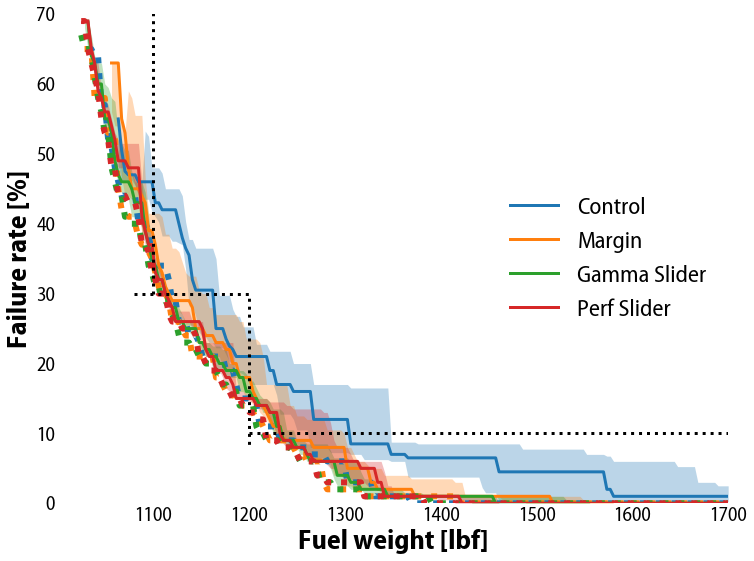

In [62]:
from scipy.interpolate import interp1d
from collections import defaultdict
percents = defaultdict(list)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
k = 1
fig, ax = subplots(figsize=(12,9), facecolor="white")
lines = []
xmin, xmax = 1000, 1700
x = linspace(xmin, xmax, 200)
interped = defaultdict(lambda: defaultdict(list))
for k, (condition, folder) in enumerate(zip(conditions, folder_names)):
    print(condition)
    pointids, idpoints, pointnum, skipped = corrected_points(folder)
    bestsbyfail = zeros((len(idpoints), len(x)))
    bestsbyfail.fill(inf)
    for j, (idn, points) in enumerate(idpoints.items()):
        pps = sorted(pareto({point: idn for point in points}).keys(), reverse=True)
        perfs, fails = zip(*pps)
        perf_fails = interp1d(perfs, fails, kind="zero", bounds_error=False, fill_value=(inf, min(fails)))
        bestsbyfail[j] = perf_fails(x)
#         print perf_fails(to)
#     print bestsbyfail
    y = nanmedian(bestsbyfail, axis=0)
    top = nanpercentile(bestsbyfail, 75, axis=0, interpolation="linear")
    top[top == inf] = y[top == inf]
    bot = nanpercentile(bestsbyfail, 25, axis=0, interpolation="linear")
    ax.fill_between(x, bot, top, lw=0, color=colors[k], alpha=0.3)#, label=condition)
    line = ax.plot(x, y, "-", color=colors[k], label=condition, linewidth=3)
    lines.append(line)
    ax.plot(x, nanmin(bestsbyfail, axis=0), ":", color=colors[k], linewidth=6)
    # fraction = 8/9.0
    # ax.plot([to[fraction*len(to)]], [y[fraction*len(to)]], shapes[problem], alpha=0.5,
    #     color=colors[tool], markeredgewidth=0.0)
    # ax.set_xlabel("Time since start [minutes]")
    ax.set_ylim([0, 70])
    # ax.set_ylabel("Cost (lower is better)")
    ax.set_xlim([xmin+1, xmax])
    # savefig(f2, "progress_%s_%s_%s" % (manner, problem, tool))
    print
legend(loc="center right")
plt.box(on=None)
# title("Pareto frontier distribution (dashed line: best, solid: median, filled area: 25th to 75th percentile)")
ylabel("Failure rate [%]", fontweight='bold')
xlabel("Fuel weight [lbf]", fontweight='bold')
plot([1200, 2000], [10, 10], "k:", linewidth=3)
plot([1100, 1100], [30, 100], "k:", linewidth=3)
plot([1080, 1200, 1200], [30, 30, 8], "k:", linewidth=3)

Control


C:\Users\Priya Pillai\.conda\envs\gp_ideation\lib\site-packages\numpy\lib\nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
C:\Users\Priya Pillai\.conda\envs\gp_ideation\lib\site-packages\numpy\lib\nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
C:\Users\Priya Pillai\.conda\envs\gp_ideation\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: All-NaN slice encountered


Margin
Gamma Slider
Perf Slider


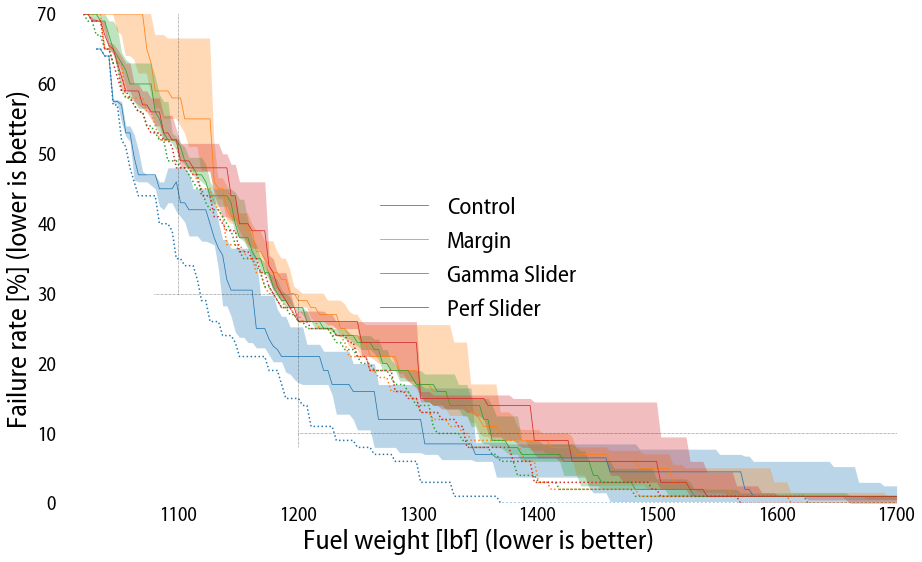

In [63]:
from analysis import get_points
from scipy.interpolate import interp1d
from collections import defaultdict
percents = defaultdict(list)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
k = 1
fig, ax = subplots(figsize=(15,9), facecolor="white")
lines = []
xmin, xmax = 1000, 1700
x = linspace(xmin, xmax, 200)
interped = defaultdict(lambda: defaultdict(list))
for k, (condition, folder) in enumerate(zip(conditions, folder_names)):
    print(condition)
    pointids, idpoints, pointnum = get_points(folder)
    bestsbyfail = zeros((len(idpoints), len(x)))
    bestsbyfail.fill(nan)
    for j, (idn, points) in enumerate(idpoints.items()):
        pps = sorted(pareto({point: idn for point in points}).keys(), reverse=True)
        perfs, fails = zip(*pps)
        perf_fails = interp1d(perfs, fails, kind="zero", bounds_error=False, fill_value=(nan, min(fails)))
        bestsbyfail[j] = perf_fails(x)
#         print perf_fails(to)
#     print bestsbyfail
    y = nanmedian(bestsbyfail, axis=0)
    top = nanpercentile(bestsbyfail, 75, axis=0, interpolation="linear")
    bot = nanpercentile(bestsbyfail, 25, axis=0, interpolation="linear")
    ax.fill_between(x, bot, top, lw=0, color=colors[k], alpha=0.3)#, label=condition)
    line = ax.plot(x, y, "-", color=colors[k], label=condition, linewidth=0.75)
    lines.append(line)
    ax.plot(x, nanmin(bestsbyfail, axis=0), ":", color=colors[k], linewidth=1.5)
    # fraction = 8/9.0
    # ax.plot([to[fraction*len(to)]], [y[fraction*len(to)]], shapes[problem], alpha=0.5,
    #     color=colors[tool], markeredgewidth=0.0)
    # ax.set_xlabel("Time since start [minutes]")
    ax.set_ylim([0, 70])
    # ax.set_ylabel("Cost (lower is better)")
    ax.set_xlim([xmin+1, xmax])
    # savefig(f2, "progress_%s_%s_%s" % (manner, problem, tool))
    print
legend(loc="center")
plt.box(on=None)
# title("Pareto frontier distribution (dashed line: best, solid: median, filled area: 25th to 75th percentile)")
ylabel("Failure rate [%] (lower is better)")
xlabel("Fuel weight [lbf] (lower is better)")
plot([1200, 2000], [10, 10], "k:", linewidth=0.5)
plot([1100, 1100], [30, 100], "k:", linewidth=0.5)
plot([1080, 1200, 1200], [30, 30, 8], "k:", linewidth=0.5)

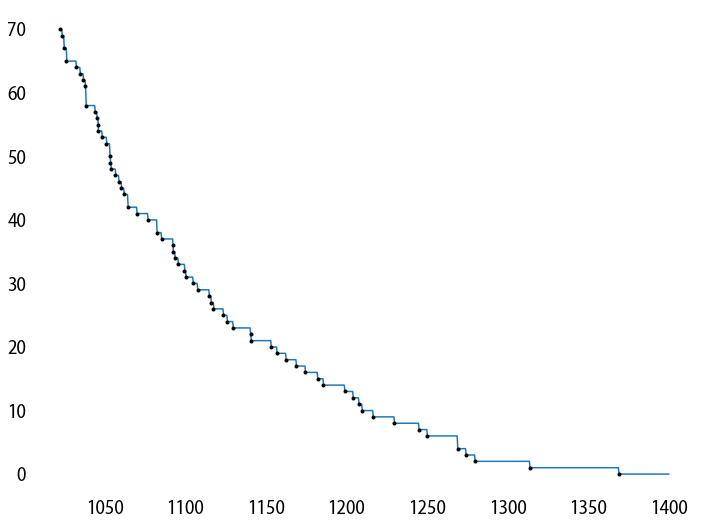

In [64]:
from scipy.interpolate import interp1d
perfs, fails = zip(*sorted(pps_all.keys()))
perf_fails = interp1d(perfs, fails, kind="zero",bounds_error=False, fill_value=(nan, 0))
x = linspace(1000, 1400, 1000)
fig, ax = subplots(figsize=(12,9), facecolor="white")
plot(x, perf_fails(x))
plot(perfs, fails, ".k")
# xlim(1320, 1400)

Control
   1    2.0%
   7   13.7%
  11    8.5%
  16    8.0%
  17   11.5%
  23    4.2%
  26    3.4%
  32    4.6%
  33    5.4%
  38    8.0%

Margin
   2    2.2%
   5    1.7%
  10   10.2%
  15    1.6%
  19    2.0%
  22    2.3%
  28    3.1%
  30    0.6%
  34    5.4%
  39    4.8%
  42    8.3%

Gamma Slider
   3    3.4%
   6    1.3%
  12    1.2%
  13    1.4%
  18    1.4%
  21    1.3%
  27    1.3%
  29    1.4%
  36    1.5%
  37    1.9%
  41    0.7%

Perf Slider
   4    1.6%
   8    2.8%
   9    1.6%
  14    1.1%
  20    0.9%
  24    1.4%
  25    0.6%
  31    1.8%
  35    2.6%
  40    1.5%
  43    0.6%

['Control', 'Margin', 'Gamma Slider', 'Perf Slider']
Control 4.30625 6.6923076923076925 8.375
Margin 1.8869395711500976 2.3043478260869565 5.0625
Gamma Slider 1.263768115942029 1.3529411764705883 1.4741379310344827
Perf Slider 1.0318840579710145 1.5 1.7314241486068112


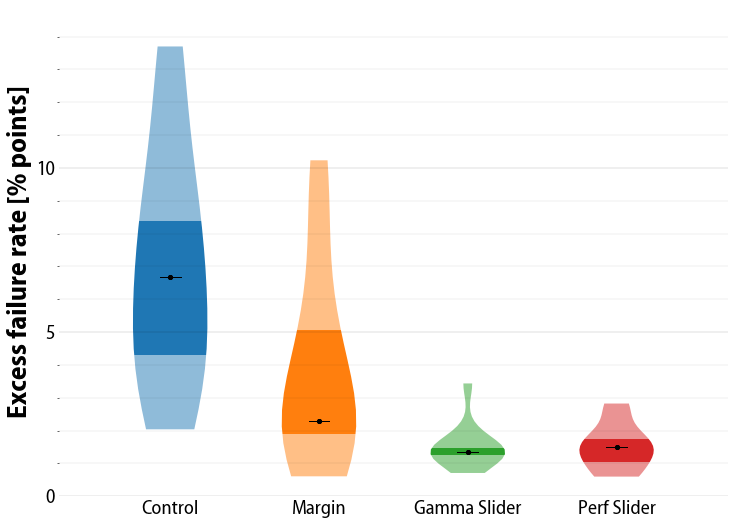

In [65]:
from collections import defaultdict
percents = defaultdict(list)
for condition, folder in zip(conditions, folder_names):   
    print(condition)
    pointids, idpoints, pointnum, skipped = corrected_points(folder)
    for idn, points in idpoints.items():
        pps = pareto({point: idn for point in points})
        total_percent_delta = 0
        for perf, fail in pps:
            total_percent_delta += fail - perf_fails(perf)
        total_percent_delta /= float(len(pps))
        print("  %2s  " % idn.split()[2][:-1], "%4.1f%%" % (total_percent_delta))
        percents[condition].append(total_percent_delta)
    print()

fig, ax = subplots(figsize=(12,9), facecolor="white")
print([condition for condition in conditions])
data = [percents[condition] for condition in conditions]
plots = ax.violinplot(data, points=20, showextrema=False, showmedians=False)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
for i, body in enumerate(plots["bodies"]):
    body.set_facecolor(colors[i])
    body.set_edgecolor("none")
    body.set_alpha(1)
for i, l in enumerate(data):
    l = array(l)
    lo = nanpercentile(l, 25, interpolation="linear")
    med = nanmedian(l)
    plot([i+0.93, i+1.07], [med, med], "-k", linewidth=1.0)
    plot([i+1, i+1], [med, med], "ok", markersize=4)
    hi = nanpercentile(l, 75, interpolation="linear")
    print(conditions[i], lo, med, hi)
    ax.fill_between([i+0.5, i + 1.5], hi, max(l), alpha=0.5,
                    edgecolor="none", facecolor="white")
    ax.fill_between([i+0.5, i + 1.5], 0, lo, alpha=0.5,
                    edgecolor="none", facecolor="white")
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

set_axis_style(ax, conditions)
ylabel("Excess failure rate [% points]", fontweight="bold")
ylim([0, 14.9])
mpl.rcParams["xtick.labelsize"] = 22
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which="major", axis="y", linewidth=0.125, color="black")
ax.grid(which='minor', axis="y", linewidth=0.0625, color="black")
plt.box(on=None)

Control
   1   16.9%
   7   60.2%
  11   72.2%
  16   14.9%
  17   55.6%
  23   42.3%
  26   39.3%
  32   15.4%
  33   33.1%
  38   96.4%

Margin
   2   16.3%
   5   11.1%
  10   235.0%
  15   23.9%
  19   20.3%
  22    6.7%
  28   18.6%
  30    9.1%
  34   103.4%
  39   25.2%
  42   100.7%

Gamma Slider
   3   28.5%
   6   11.1%
  12    4.9%
  13    7.2%
  18    8.5%
  21    5.1%
  27    7.9%
  29   10.3%
  36   14.8%
  37   12.0%
  41    6.6%

Perf Slider
   4    8.5%
   8    8.7%
   9   113.4%
  14    5.2%
  20    5.8%
  24   15.6%
  25    3.1%
  31   14.1%
  35   91.8%
  40   31.9%
  43    8.1%

['Control', 'Margin', 'Gamma Slider', 'Perf Slider']
Control 20.979369760160694 40.842308247048265 59.05896730823643
Margin 13.667271320366991 20.291342306375956 62.97816610632923
Gamma Slider 6.902021495996007 8.549178356723134 11.518318665629103
Perf Slider 6.943411491531776 8.659415836582385 23.75732303205946


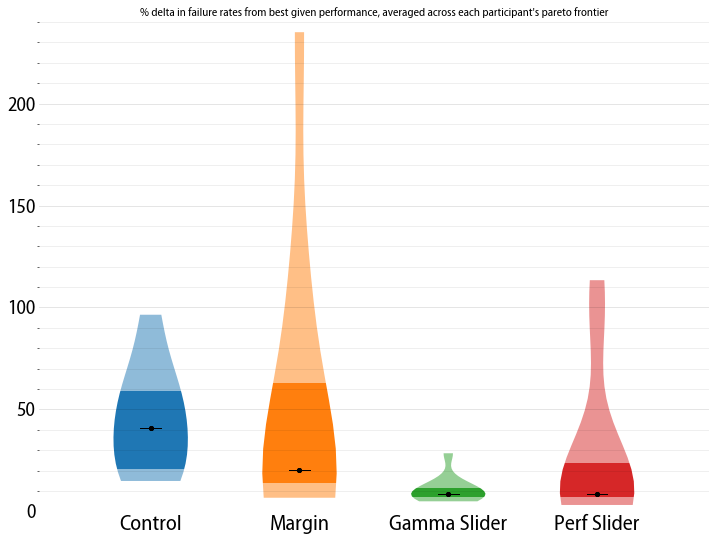

In [66]:
from collections import defaultdict
percents = defaultdict(list)
for condition, folder in zip(conditions, folder_names):   
    print(condition)
    pointids, idpoints, pointnum, skipped = corrected_points(folder)
    for idn, points in idpoints.items():
        pps = pareto({point: idn for point in points})
        total_percent_delta = 0
        for perf, fail in pps:
            if perf_fails(perf) == 0:
                continue
            total_percent_delta += fail/perf_fails(perf) - 1
        total_percent_delta /= float(len(pps))
        print("  %2s  " % idn.split()[2][:-1], "%4.1f%%" % (100*total_percent_delta))
        percents[condition].append(100*total_percent_delta)
    print()

fig, ax = subplots(figsize=(12,9), facecolor="white")
print([condition for condition in conditions])
data = [percents[condition] for condition in conditions]
plots = ax.violinplot(data, points=20, showextrema=False, showmedians=False)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
for i, body in enumerate(plots["bodies"]):
    body.set_facecolor(colors[i])
    body.set_edgecolor("none")
    body.set_alpha(1)
for i, l in enumerate(data):
    l = array(l)
    lo = nanpercentile(l, 25, interpolation="linear")
    med = nanmedian(l)
    plot([i+0.93, i+1.07], [med, med], "-k", linewidth=1.0)
    plot([i+1, i+1], [med, med], "ok", markersize=4)
    hi = nanpercentile(l, 75, interpolation="linear")
    print(conditions[i], lo, med, hi)
    ax.fill_between([i+0.5, i + 1.5], hi, max(l), alpha=0.5,
                    edgecolor="none", facecolor="white")
    ax.fill_between([i+0.5, i + 1.5], 0, lo, alpha=0.5,
                    edgecolor="none", facecolor="white")
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

set_axis_style(ax, conditions)
title("% delta in failure rates from best given performance, averaged across each participant's pareto frontier")
ylim([0, 240])
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.grid(which="major", axis="y", alpha=0.125, color="black")
ax.grid(which='minor', axis="y", alpha=0.08, color="black")
plt.box(on=None)

Control
   1    1.1%
   7    4.8%
  11    4.1%
  16   17.2%
  17   10.6%
  23    2.2%
  26    2.8%
  32    2.4%
  33    3.3%
  38    4.0%

Margin
   2    1.6%
   5    1.5%
  10   11.3%
  15    1.5%
  19    2.0%
  22    0.9%
  28    2.0%
  30    1.1%
  34    4.8%
  39    2.8%
  42    5.3%

Gamma Slider
   3    2.0%
   6    0.8%
  12    0.6%
  13    1.0%
  18    1.1%
  21    0.9%
  27    0.9%
  29    1.2%
  36    1.0%
  37    1.7%
  41    0.5%

Perf Slider
   4    0.9%
   8    1.7%
   9    2.0%
  14    0.8%
  20    0.9%
  24    1.0%
  25    0.5%
  31    1.1%
  35    2.1%
  40    1.2%
  43    1.2%

['Control', 'Margin', 'Gamma Slider', 'Perf Slider']
Control 2.496520571335408 3.662717111105753 4.624348060041884
Margin 1.5199957674922193 1.9774701154810077 3.8086887175070294
Gamma Slider 0.8470338208118462 0.9728811356918811 1.1318151691563703
Perf Slider 0.9233471549394183 1.0693101580816313 1.4444550611278562


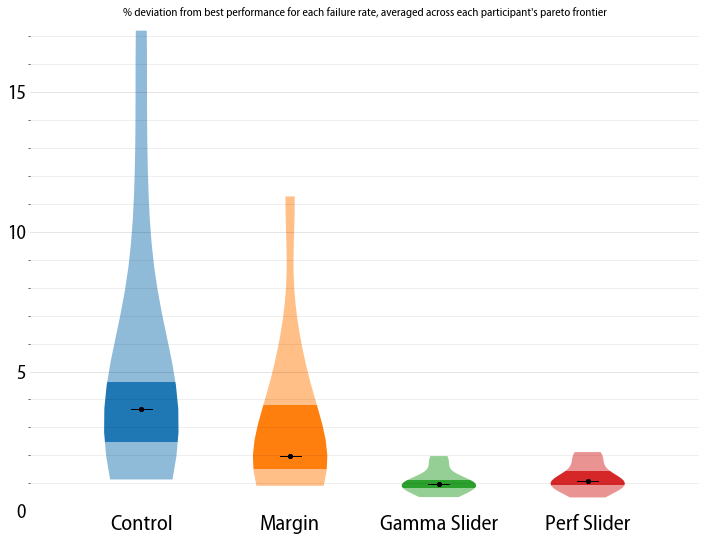

In [67]:
from collections import defaultdict
percents = defaultdict(list)
for condition, folder in zip(conditions, folder_names):   
    print(condition)
    pointids, idpoints, pointnum, skipped = corrected_points(folder)
    for idn, points in idpoints.items():
        pps = pareto({point: idn for point in points})
        total_percent_delta = 0
        for perf, fail in pps:
            total_percent_delta += perf/fail_perfs[fail] - 1
        total_percent_delta /= len(pps)
        print("  %2s  " % idn.split()[2][:-1], "%4.1f%%" % (100*total_percent_delta))
        percents[condition].append(100*total_percent_delta)
    print()

fig, ax = subplots(figsize=(12,9), facecolor="white")
print([condition for condition in conditions])
data = [percents[condition] for condition in conditions]
plots = ax.violinplot(data, points=20, showextrema=False, showmedians=False)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
for i, body in enumerate(plots["bodies"]):
    body.set_facecolor(colors[i])
    body.set_edgecolor("none")
    body.set_alpha(1)
for i, l in enumerate(data):
    l = array(l)
    lo = nanpercentile(l, 25, interpolation="linear")
    med = nanmedian(l)
    plot([i+0.93, i+1.07], [med, med], "-k", linewidth=1.0)
    plot([i+1, i+1], [med, med], "ok", markersize=4)
    hi = nanpercentile(l, 75, interpolation="linear")
    print(conditions[i], lo, med, hi)
    ax.fill_between([i+0.5, i + 1.5], hi, max(l), alpha=0.5,
                    edgecolor="none", facecolor="white")
    ax.fill_between([i+0.5, i + 1.5], 0, lo, alpha=0.5,
                    edgecolor="none", facecolor="white")
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

set_axis_style(ax, conditions)
title("% deviation from best performance for each failure rate, averaged across each participant's pareto frontier")
ylim([0, 17.5])
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which="major", axis="y", alpha=0.125, color="black")
ax.grid(which='minor', axis="y", alpha=0.08, color="black")
plt.box(on=None)

Control

Margin

Gamma Slider

Perf Slider

['Control', 'Margin', 'Gamma Slider', 'Perf Slider']
Control 1.2768583769181718 2.579329830579591 4.522850309917964
Margin 0.5990876470318984 1.1975652655575986 3.5126596495744176
Gamma Slider 0.18922882932119744 0.5136145002195169 1.1910879736653723
Perf Slider 0.22595489417933656 0.565492908780052 1.3182128175519114


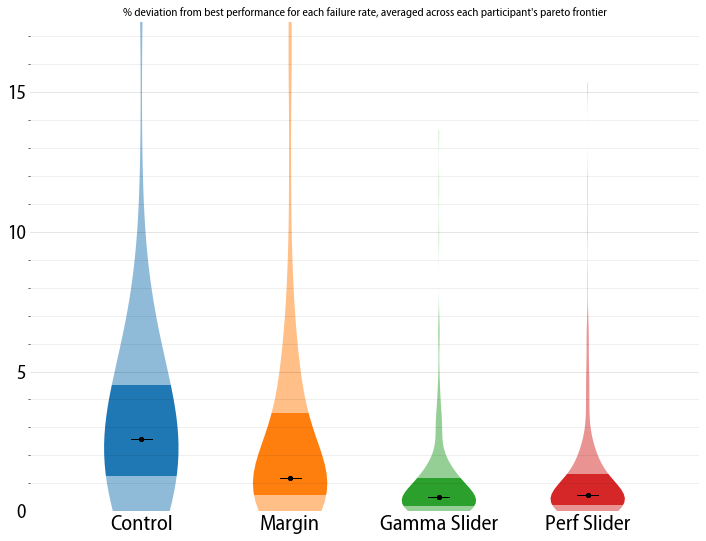

In [68]:
from collections import defaultdict
percents = defaultdict(list)
for condition, folder in zip(conditions, folder_names):   
    print(condition)
    pointids, idpoints, pointnum, skipped = corrected_points(folder)
    for idn, points in idpoints.items():
        pps = pareto({point: idn for point in points})
        total_percent_delta = 0
        for perf, fail in pps:
            percents[condition].append(100*(perf/fail_perfs[fail] - 1))
#             total_percent_delta += perf/fail_perfs[fail] - 1
#         total_percent_delta /= len(pps)
#         print "  %2s  " % idn.split()[2][:-1], "%4.1f%%" % (100*total_percent_delta)
#         percents[condition].append(100*total_percent_delta)
    print()

fig, ax = subplots(figsize=(12,9), facecolor="white")
print([condition for condition in conditions])
data = [percents[condition] for condition in conditions]
plots = ax.violinplot(data, points=100, showextrema=False, showmedians=False)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
for i, body in enumerate(plots["bodies"]):
    body.set_facecolor(colors[i])
    body.set_edgecolor("none")
    body.set_alpha(1)
for i, l in enumerate(data):
    l = array(l)
    lo = nanpercentile(l, 25, interpolation="linear")
    med = nanmedian(l)
    plot([i+0.93, i+1.07], [med, med], "-k", linewidth=1.0)
    plot([i+1, i+1], [med, med], "ok", markersize=4)
    hi = nanpercentile(l, 75, interpolation="linear")
    print(conditions[i], lo, med, hi)
    ax.fill_between([i+0.5, i + 1.5], hi, max(l), alpha=0.5,
                    edgecolor="none", facecolor="white")
    ax.fill_between([i+0.5, i + 1.5], 0, lo, alpha=0.5,
                    edgecolor="none", facecolor="white")
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

set_axis_style(ax, conditions)
title("% deviation from best performance for each failure rate, averaged across each participant's pareto frontier")
ylim([0, 17.5])
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which="major", axis="y", alpha=0.125, color="black")
ax.grid(which='minor', axis="y", alpha=0.08, color="black")
plt.box(on=None)

Control
   1   13.2%
   7   52.5%
  11   46.6%
  16   211.7%
  17   126.8%
  23   25.6%
  26   33.5%
  32   28.6%
  33   40.1%
  38   45.8%

Margin
   2   19.0%
   5   18.0%
  10   137.0%
  15   18.9%
  19   24.6%
  22   10.7%
  28   23.9%
  30   14.3%
  34   59.4%
  39   33.4%
  42   63.7%

Gamma Slider
   3   23.2%
   6    9.6%
  12    7.0%
  13   11.7%
  18   13.3%
  21   10.8%
  27   10.8%
  29   14.3%
  36   12.1%
  37   21.0%
  41    5.9%

Perf Slider
   4   10.9%
   8   20.8%
   9   24.2%
  14    8.8%
  20   11.4%
  24   11.8%
  25    5.8%
  31   12.7%
  35   25.7%
  40   14.4%
  43   15.5%

['Control', 'Margin', 'Gamma Slider', 'Perf Slider']
Control 29.80491766107153 42.92456119627774 51.015578880418225
Margin 18.430836613397535 23.86375105475767 46.40067456335393
Gamma Slider 10.175475422306112 11.65055479278815 13.81131323232525
Perf Slider 11.13019822895318 12.727078890984947 18.12862917460496


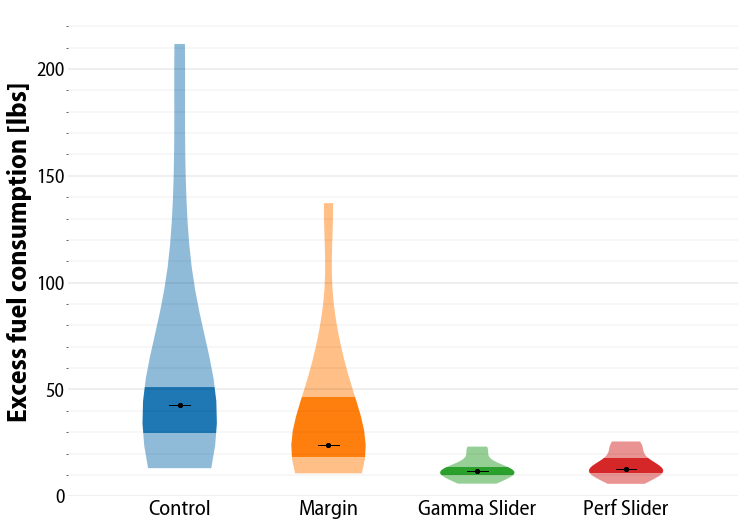

In [69]:
from collections import defaultdict
percents = defaultdict(list)
for condition, folder in zip(conditions, folder_names):   
    print(condition)
    pointids, idpoints, pointnum, skipped = corrected_points(folder)
    for idn, points in idpoints.items():
        pps = pareto({point: idn for point in points})
        total_percent_delta = 0
        for perf, fail in pps:
            total_percent_delta += perf - fail_perfs[fail]
        total_percent_delta /= len(pps)
        print("  %2s  " % idn.split()[2][:-1], "%4.1f%%" % (total_percent_delta))
        percents[condition].append(total_percent_delta)
    print()

fig, ax = subplots(figsize=(12,9), facecolor="white")
print([condition for condition in conditions])
data = [percents[condition] for condition in conditions]
plots = ax.violinplot(data, points=20, showextrema=False, showmedians=False)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
for i, body in enumerate(plots["bodies"]):
    body.set_facecolor(colors[i])
    body.set_edgecolor("none")
    body.set_alpha(1)
for i, l in enumerate(data):
    l = array(l)
    lo = nanpercentile(l, 25, interpolation="linear")
    med = nanmedian(l)
    plot([i+0.93, i+1.07], [med, med], "-k", linewidth=1.0)
    plot([i+1, i+1], [med, med], "ok", markersize=4)
    hi = nanpercentile(l, 75, interpolation="linear")
    print(conditions[i], lo, med, hi)
    ax.fill_between([i+0.5, i + 1.5], hi, max(l), alpha=0.5,
                    edgecolor="none", facecolor="white")
    ax.fill_between([i+0.5, i + 1.5], 0, lo, alpha=0.5,
                    edgecolor="none", facecolor="white")
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

set_axis_style(ax, conditions)
ylim([0, 229])
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(10))
ylabel("Excess fuel consumption [lbs]", fontweight="bold")
mpl.rcParams["xtick.labelsize"] = 22
ax.grid(which="major", axis="y", linewidth=0.125, color="black")
ax.grid(which='minor', axis="y", linewidth=0.0625, color="black")
plt.box(on=None)

Control

Margin

Gamma Slider

Perf Slider

['Control', 'Margin', 'Gamma Slider', 'Perf Slider']
Control 14.013972959811781 29.990365203512738 51.08157454295457
Margin 6.834786952337367 13.443044922966465 41.15592760919736
Gamma Slider 2.0306938512843544 5.7889429374015435 13.739949360634796
Perf Slider 2.3185420277704907 6.378558296951269 15.095971669651362


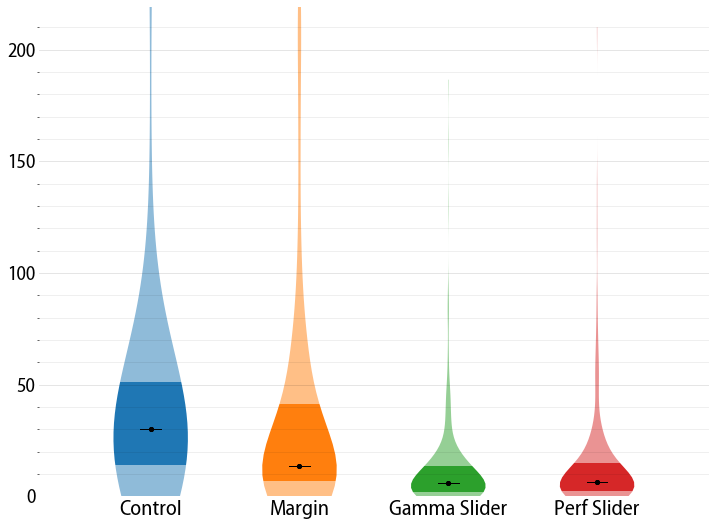

In [70]:
from collections import defaultdict
percents = defaultdict(list)
for condition, folder in zip(conditions, folder_names):   
    print(condition)
    pointids, idpoints, pointnum, skipped = corrected_points(folder)
    for idn, points in idpoints.items():
        pps = pareto({point: idn for point in points})
        total_percent_delta = 0
        for perf, fail in pps:
            percents[condition].append(perf - fail_perfs[fail])
#             total_percent_delta += perf - fail_perfs[fail]
#         total_percent_delta /= len(pps)
#         print "  %2s  " % idn.split()[2][:-1], "%4.1f%%" % (total_percent_delta)
#         percents[condition].append(total_percent_delta)
    print()

# print percents
fig, ax = subplots(figsize=(12,9), facecolor="white")
print([condition for condition in conditions])
data = [percents[condition] for condition in conditions]
plots = ax.violinplot(data, points=100, showextrema=False, showmedians=False)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
for i, body in enumerate(plots["bodies"]):
    body.set_facecolor(colors[i])
    body.set_edgecolor("none")
    body.set_alpha(1)
for i, l in enumerate(data):
    l = array(l)
    lo = nanpercentile(l, 25, interpolation="linear")
    med = nanmedian(l)
    plot([i+0.93, i+1.07], [med, med], "-k", linewidth=1.0)
    plot([i+1, i+1], [med, med], "ok", markersize=4)
    hi = nanpercentile(l, 75, interpolation="linear")
    print(conditions[i], lo, med, hi)
    ax.fill_between([i+0.5, i + 1.5], hi, max(l), alpha=0.5,
                    edgecolor="none", facecolor="white")
    ax.fill_between([i+0.5, i + 1.5], 0, lo, alpha=0.5,
                    edgecolor="none", facecolor="white")
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

set_axis_style(ax, conditions)
# title("Performance left on the table by each point in each user's pareto frontier")
ylim([0, 219])
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.grid(which="major", axis="y", alpha=0.125, color="black")
ax.grid(which='minor', axis="y", alpha=0.08, color="black")
plt.box(on=None)

Control

Margin

Gamma Slider

Perf Slider

['Control', 'Margin', 'Gamma Slider', 'Perf Slider']
Control 2.0 5.0 8.75
Margin 0.0 2.0 5.0
Gamma Slider 0.0 1.0 2.0
Perf Slider 0.0 1.0 2.0


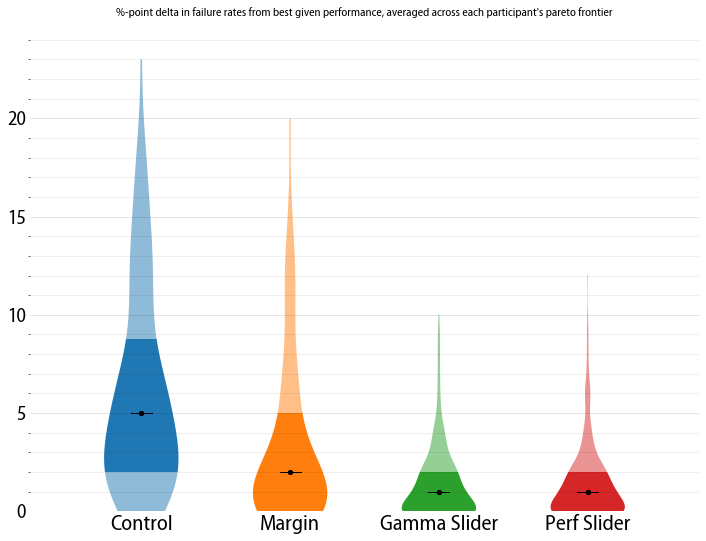

In [72]:
from collections import defaultdict
percents = defaultdict(list)
for condition, folder in zip(conditions, folder_names):   
    print(condition)
    pointids, idpoints, pointnum, skipped = corrected_points(folder)
    for idn, points in idpoints.items():
        pps = pareto({point: idn for point in points})
        total_percent_delta = 0
        for perf, fail in pps:
            percents[condition].append(fail - perf_fails(perf))
#         total_percent_delta /= float(len(pps))
#         print "  %2s  " % idn.split()[2][:-1], "%4.1f%%" % (total_percent_delta)
#         percents[condition].append(total_percent_delta)
    print()

fig, ax = subplots(figsize=(12,9), facecolor="white")
print([condition for condition in conditions])
data = [percents[condition] for condition in conditions]
plots = ax.violinplot(data, points=100, showextrema=False, showmedians=False)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
for i, body in enumerate(plots["bodies"]):
    body.set_facecolor(colors[i])
    body.set_edgecolor("none")
    body.set_alpha(1)
for i, l in enumerate(data):
    l = array(l)
    lo = nanpercentile(l, 25, interpolation="linear")
    med = nanmedian(l)
    plot([i+0.93, i+1.07], [med, med], "-k", linewidth=1.0)
    plot([i+1, i+1], [med, med], "ok", markersize=4)
    hi = nanpercentile(l, 75, interpolation="linear")
    print(conditions[i], lo, med, hi)
    ax.fill_between([i+0.5, i + 1.5], hi, max(l), alpha=0.5,
                    edgecolor="none", facecolor="white")
    ax.fill_between([i+0.5, i + 1.5], 0, lo, alpha=0.5,
                    edgecolor="none", facecolor="white")
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

set_axis_style(ax, conditions)
title("%-point delta in failure rates from best given performance, averaged across each participant's pareto frontier")
ylim([0, 24.9])
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which="major", axis="y", alpha=0.125, color="black")
ax.grid(which='minor', axis="y", alpha=0.08, color="black")
plt.box(on=None)

C:\Users\Priya Pillai\.conda\envs\gp_ideation\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


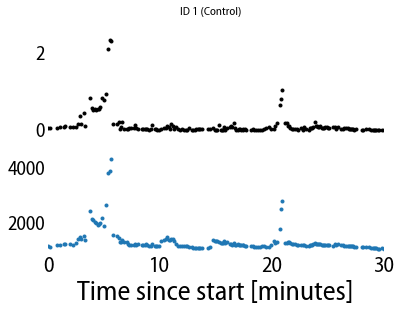

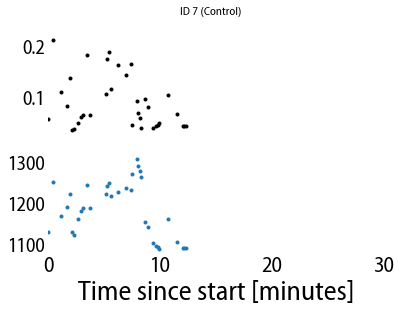

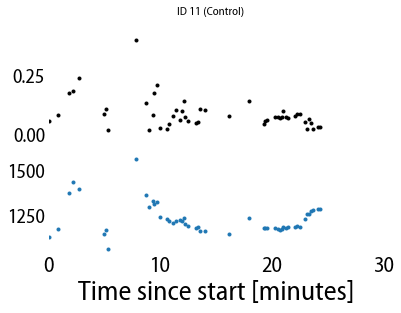

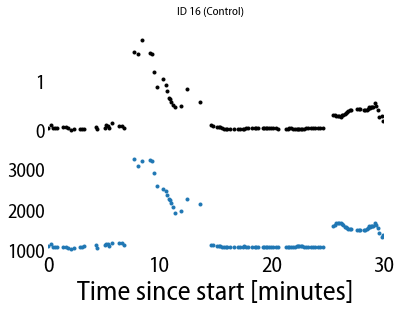

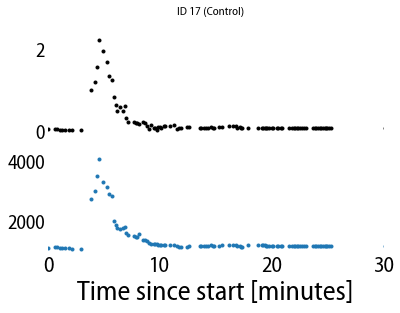

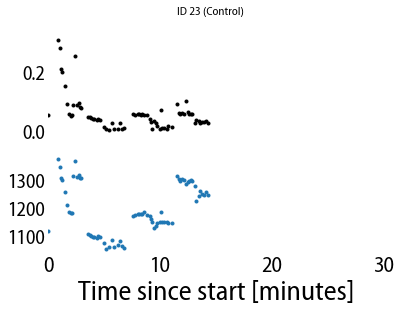

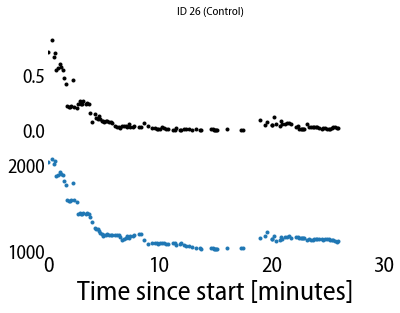

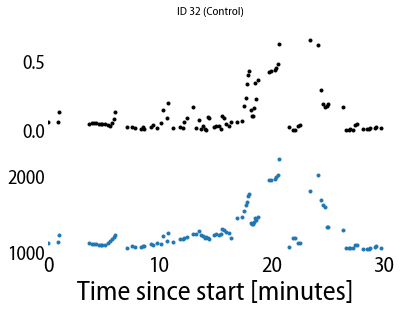

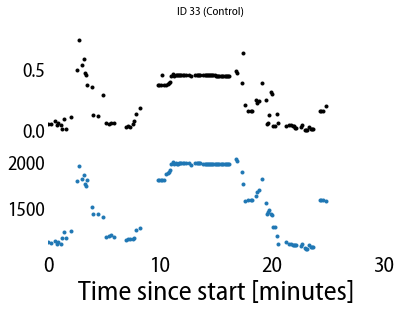

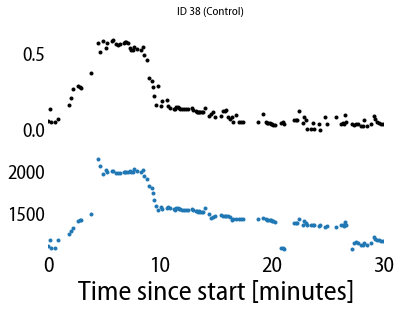

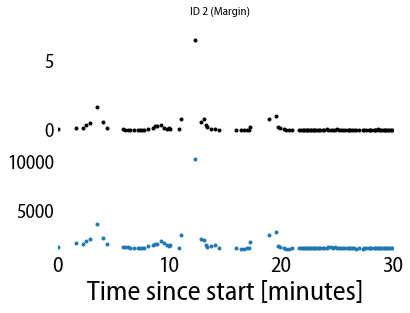

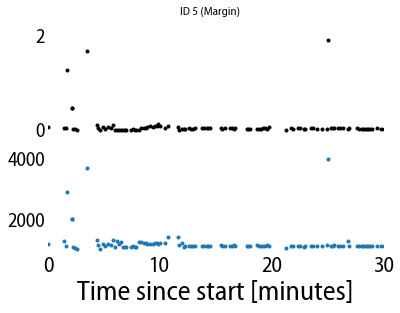

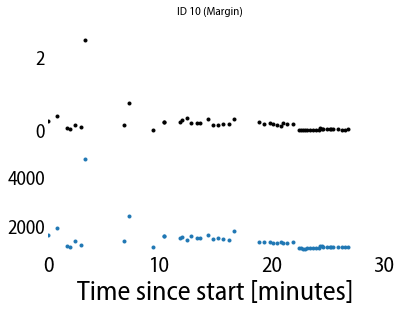

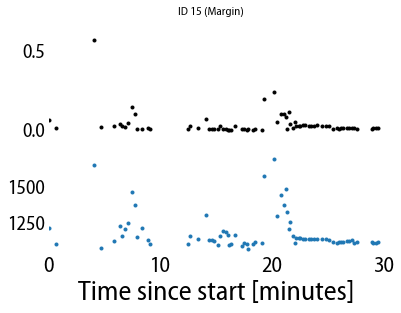

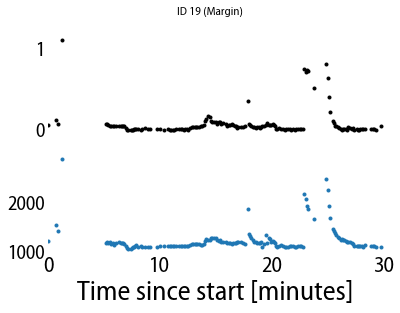

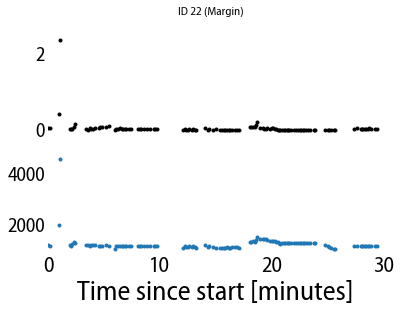

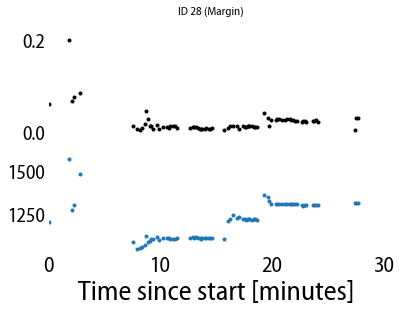

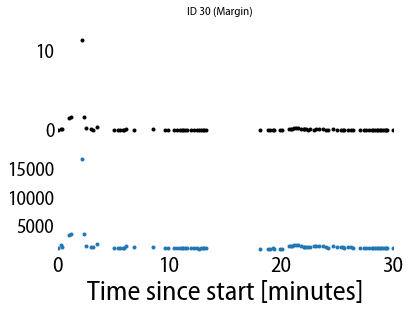

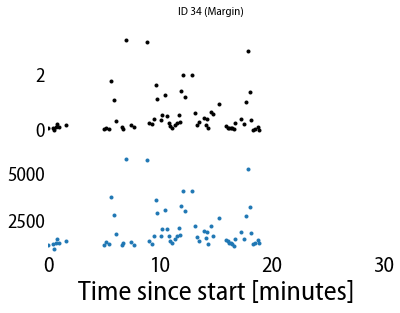

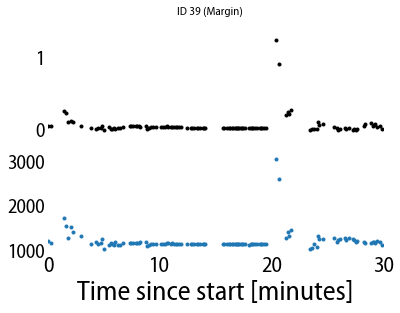

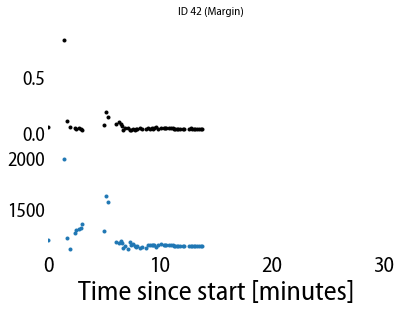

In [74]:
from collections import defaultdict

for condition, folder in list(zip(conditions, folder_names))[:2]:
    pointids, idpoints, pointnum, skipped = corrected_points(folder)
    for idn, points in idpoints.items():
        times = []
        for point in points:
            times.append(int(pointnum[point+(idn,)]))
        metric = [perf/fail_perfs[fail] - 1 for perf, fail in points]
        fig, (ax1, ax2) = subplots(2, 1, sharex=True, figsize=(6,4), facecolor="white")
        times = array(times) - times[0]
        ax1.plot(times/60., metric, "k.")
#         ax1.set_ylim([0, 0.5])
        ax2.plot(times/60., [perf for perf, _ in points], ".")
        ax2.set_xlabel("Time since start [minutes]")
        ax2.set_xlim([0, 30])
        fig.suptitle(" ".join(idn.split()[1:])[1:-1] + " (%s)" % condition)
#         break

Control 78.5 114.0 126.5
Margin 70.0 85.0 113.0
Gamma Slider 112.5 129.0 150.5
Perf Slider 105.5 146.0 177.5
Control 0.3642857142857143 0.5656837538164873 0.670054054054054
Margin 0.5209930631617379 0.6146788990825688 0.7581081081081081
Gamma Slider 0.7673314339981007 0.7906976744186046 0.8778488534675615
Perf Slider 0.8091626213592233 0.8235294117647058 0.8687516187516187
Control 0.0 0.0 0.0
Margin 0.0 1.0 1.5
Gamma Slider 1.5 2.0 3.0
Perf Slider 1.0 2.0 2.5


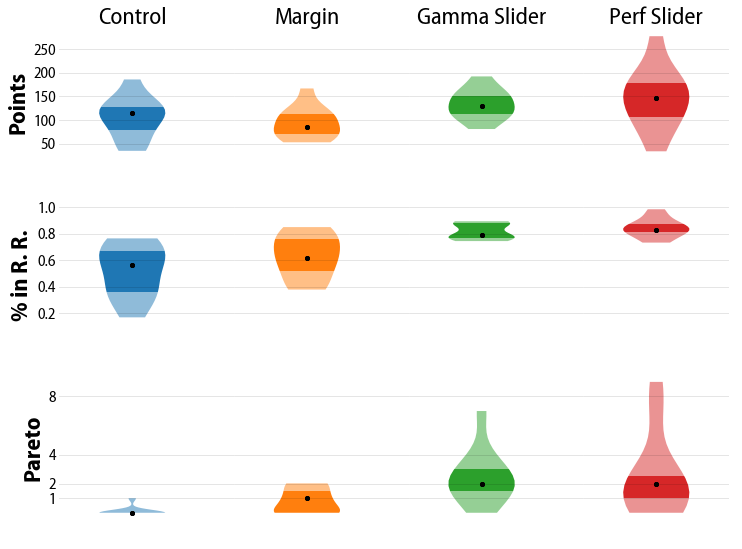

In [75]:
from collections import defaultdict
percents = defaultdict(list)

big = 24
small = 16

points = [[185, 35, 50, 123, 105, 72, 127, 98, 125, 131], 
          [104, 109, 53, 74, 166, 120, 79, 85, 66, 117, 58], 
          [81, 104, 120, 148, 152, 116, 129, 109, 167, 149, 192], 
          [176, 34, 276, 146, 179, 108, 202, 143, 84, 159, 103]]

outside_regions = [[0.3837837837837838, 0.6285714285714286, 0.66, 0.8292682926829268, 0.638095238095238, 0.2638888888888889, 0.4094488188976378, 0.45918367346938777, 0.312, 0.2366412213740458],
                   [0.40384615384615385, 0.3853211009174312, 0.6037735849056604, 0.28378378378378377, 0.42771084337349397, 0.2, 0.1518987341772152, 0.18823529411764706, 0.5303030303030303, 0.2905982905982906, 0.6206896551724138],
                   [0.2345679012345679, 0.23076923076923078, 0.14166666666666666, 0.10810810810810811, 0.23684210526315788, 0.11206896551724138, 0.20930232558139536, 0.25688073394495414, 0.2155688622754491, 0.11409395973154363, 0.13020833333333334],
                   [0.1875, 0.17647058823529413, 0.018115942028985508, 0.0684931506849315, 0.2681564245810056, 0.12962962962962962, 0.24752475247524752, 0.13286713286713286, 0.17857142857142858, 0.14465408805031446, 0.1941747572815534]]

in_regions = [[1-i for i in out_cond] for out_cond in outside_regions]

combined_pareto = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                   [2, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0],
                   [1, 3, 2, 2, 3, 1, 4, 2, 2, 0, 7],
                   [2, 0, 1, 3, 7, 2, 9, 2, 0, 1, 1]]

points_ticks = [50,100,150,200,250]
in_regions_ticks = [.2,.4,.6,.8,1]
combined_pareto_ticks = [1,2,4,8]


labels =["Points",
         "% in R. R.",
         "Pareto"]

data = [points,
        in_regions,
        combined_pareto]

ticks = [points_ticks,
         in_regions_ticks,
         combined_pareto_ticks]

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


fig, ax = subplots(nrows=3, ncols=4, sharey="row", sharex="col", figsize=(12,9), facecolor="none")
back_ax = [fig.add_subplot(3, 1, i+1, zorder=-1, ) for i in range(3)]
for i in range(3):
    for _, spine in back_ax[i].spines.items():
        spine.set_visible(False)
    
    back_ax[i].tick_params(labelleft=False, labelbottom=False, left=False, right=False )
    back_ax[i].get_shared_y_axes().join(back_ax[i],ax[i,0])
    back_ax[i].grid(axis="y", alpha=0.125, color="black")
    back_ax[i].set_yticks(ticks[i])
    
    ax[i,0].set_yticks(ticks[i])
    ax[i,0].set_ylabel(labels[i], fontsize=big, fontweight="bold")
    ax[i,0].tick_params("y", labelsize=small)

for i in range(len(conditions)):
    ax[0,i].set_title(conditions[i], fontsize=big)


for i in range(3):
    for j in range(len(conditions)):
        ax[i,j].tick_params(axis="x", colors="none")
        myplot = ax[i,j].violinplot(data[i][j], points=20, showextrema=False, showmedians=False)
        for body in myplot["bodies"]:
            body.set_facecolor(colors[j])
            body.set_edgecolor("none")
            body.set_alpha(1)
        lo = nanpercentile(data[i][j], 25, interpolation="linear")
        med = nanmedian(data[i][j])
#         ax[i,j].plot([0.93, 1.07], [med, med], "-k", linewidth=1.0)
        ax[i,j].plot([1, 1], [med, med], "ok", markersize=4)
        hi = nanpercentile(data[i][j], 75, interpolation="linear")
        print(conditions[j], lo, med, hi)
        ax[i,j].fill_between([0.5, 1.5], hi, max(data[i][j]), alpha=0.5,
                        edgecolor="none", facecolor="white")
        ax[i,j].fill_between([0.5, 1.5], 0, lo, alpha=0.5,
                        edgecolor="none", facecolor="white")
        ax[i,j].grid(True, axis="y", alpha=0.125, color="black")

        
plt.savefig("sumstats.svg")
